# Import

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

# Preprocess

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [6]:
print(X_train[10].shape)

(28, 28)


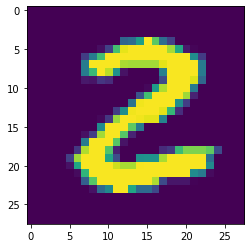

Label:  2


In [7]:
plt.imshow(X_train[25])
plt.show()

print("Label: ",Y_train[25])

In [8]:
# unique labels/values

print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [9]:
# scaling values -> to acheive good accuracy
X_train = X_train/255
X_test = X_test/255

# Train

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [12]:
model.fit(X_train, Y_train, epochs=14)

Epoch 1/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0835 - accuracy: 0.9744
Epoch 5/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0685 - accuracy: 0.9787
Epoch 6/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0609 - accuracy: 0.9806
Epoch 7/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0513 - accuracy: 0.9838
Epoch 8/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0458 - accuracy: 0.9855
Epoch 9/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0402 - accuracy: 0.9873
Epoch 10/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.034

# Evaluate

In [13]:
loss, accuracy = model.evaluate(X_test, Y_test)

print("Loss is: ", loss)
print("Accuracy is: ", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1140 - accuracy: 0.9733
Loss is:  0.11403161287307739
Accuracy is:  0.9732999801635742


In [14]:
Y_pred = model.predict(X_test)

print(Y_pred.shape)

(10000, 10)


In [15]:
print(Y_pred[0])

[5.6257844e-04 7.9906499e-01 1.9286969e-01 9.7061646e-01 3.2392859e-06
 1.8724799e-04 6.9834472e-11 1.0000000e+00 4.6042107e-05 8.5658276e-01]


In [16]:
#converting probability to label

label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [17]:
# converting for all
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

**Building Confusion Matrix**

In [18]:
# confusion_matrix(true labels, predicted labels)
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [19]:
print(conf_mat)

tf.Tensor(
[[ 969    1    0    0    2    1    3    1    2    1]
 [   0 1127    2    1    0    1    2    1    1    0]
 [   3    3 1005    2    2    0    2   11    3    1]
 [   0    1    7  975    1   12    1    4    2    7]
 [   0    0    6    0  954    0    4    4    1   13]
 [   2    0    0   15    1  855    5    1    9    4]
 [   5    3    2    1    6    4  930    0    7    0]
 [   1    2    7    2    0    0    0 1007    3    6]
 [   5    2    4    7    5    3    3    9  931    5]
 [   0    3    1    7    6    4    2    7    3  976]], shape=(10, 10), dtype=int32)


Text(0.5, 51.0, 'Predicted Labels')

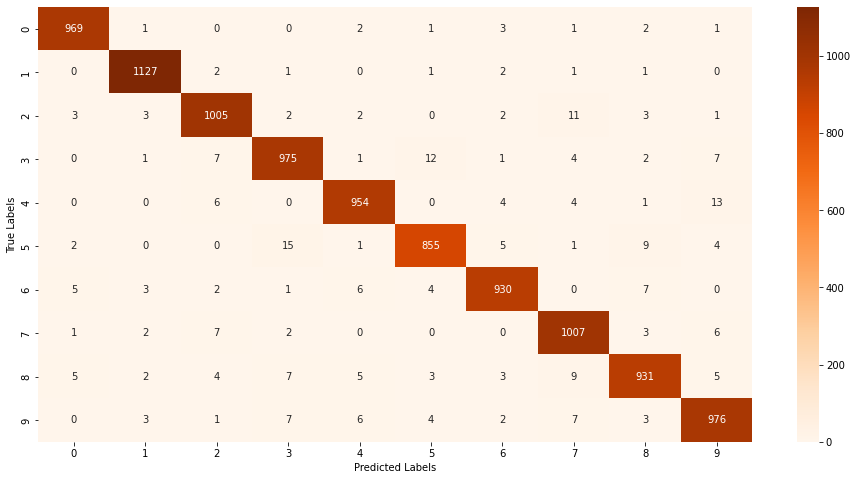

In [20]:
plt.figure(figsize=(16,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Oranges')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

# Predictive System

In [46]:
input_image_path ='/content/six.png'
input_image = cv2.imread(input_image_path)

In [47]:
print(input_image)
type(input_image)

[[[ 4  4  4]
  [ 4  4  4]
  [ 4  4  4]
  ...
  [ 4  4  4]
  [ 0  0  0]
  [25 25 25]]

 [[ 4  4  4]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [25 25 25]]

 [[ 4  4  4]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [25 25 25]]

 ...

 [[ 4  4  4]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [25 25 25]]

 [[ 4  4  4]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [25 25 25]]

 [[ 4  4  4]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [25 25 25]]]


numpy.ndarray

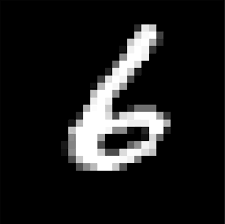

In [48]:
cv2_imshow(input_image)

In [49]:
gray_img = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

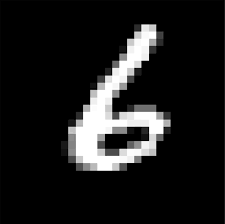

In [50]:
cv2_imshow(gray_img)

In [51]:
resz_img = cv2.resize(gray_img,(28,28))

In [52]:
cv2_imshow(resz_img)

In [53]:
resz_img = resz_img/255
reshp_img = np.reshape(resz_img,[1,28,28])

In [54]:
input_prediction = model.predict(reshp_img)
print(input_prediction)

[[1.9033548e-01 1.5654463e-05 6.3662809e-01 1.5699863e-04 2.7089447e-01
  7.6705813e-03 9.9173367e-01 1.7899275e-04 3.7242211e-07 3.5514116e-08]]


In [55]:
input_predict_label = np.argmax(input_prediction)

In [57]:
print("Number is: ", input_predict_label)

Number is:  6
